In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.conv_learner import *
from planet import *

PATH='/data/planet/'
arch=resnet34
sz=256
bs=64

In [3]:
ls {PATH}

__MACOSX/                     test-jpg/                 train-jpg/
models/                       test-jpg-additional/      train_v2.csv
sample_submission_v2.csv      test_v2_file_mapping.csv
sample_submission_v2.csv.zip  tmp/


In [4]:
n = len(list(open(f'{PATH}train_v2.csv')))-1
val_idxs = get_cv_idxs(n)

In [5]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down)
    return ImageClassifierData.from_csv(PATH, 'train-jpg', f'{PATH}train_v2.csv', test_name='test-jpg', tfms=tfms, bs=bs, suffix='.jpg', val_idxs=val_idxs)

# Metrics

In [6]:
metrics=[f2]

# Look at data

In [7]:
data = get_data(sz, bs)

In [8]:
x, y = next(iter(data.trn_dl))

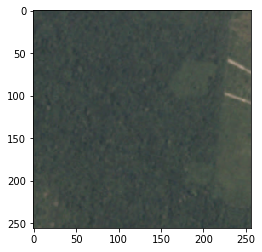

In [9]:
plt.imshow(data.trn_ds.denorm(x)[0])

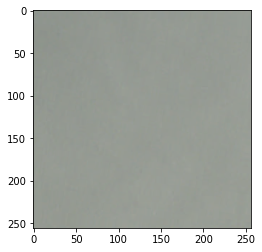

In [10]:
plt.imshow(data.trn_ds.denorm(x)[1])

In [11]:
data.classes

['agriculture',
 'artisinal_mine',
 'bare_ground',
 'blooming',
 'blow_down',
 'clear',
 'cloudy',
 'conventional_mine',
 'cultivation',
 'habitation',
 'haze',
 'partly_cloudy',
 'primary',
 'road',
 'selective_logging',
 'slash_burn',
 'water']

In [45]:
data = get_data(32, bs)

In [46]:
learn = ConvLearner.pretrained(arch, data, ps=0.5, precompute=True, metrics=metrics)

# Start traing with sz=32

In [7]:
data = get_data(32, bs)

In [8]:
learn = ConvLearner.pretrained(arch, data, ps=0.5, precompute=True, metrics=metrics)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 77234530.25it/s]


In [14]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   f2                           
    0      0.227374   0.373826   0.804578  



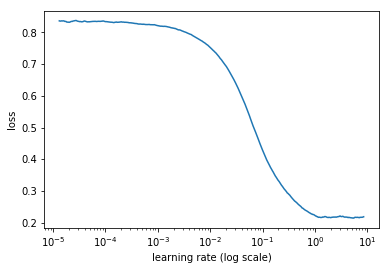

In [15]:
learn.sched.plot()

In [16]:
lr = 10e-1

In [17]:
learn.fit(lr, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   f2                           
    0      0.149681   0.136289   0.87853   
    1      0.145397   0.132395   0.883912                     
    2      0.137934   0.130907   0.885495                     



[0.13090724, 0.8854953096031325]

In [18]:
lra = [lr/9, lr/3, lr]

In [19]:
learn.precompute = False
learn.unfreeze()
learn.fit(lra, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   f2                          
    0      0.14436    0.132454   0.887893  
    1      0.142075   0.141605   0.874472                    
    2      0.130167   0.121103   0.898139                    
    3      0.138784   0.138198   0.877007                    
    4      0.130337   0.121597   0.897497                    
    5      0.123339   0.116779   0.899402                    
    6      0.120455   0.115211   0.902043                    



[0.115210995, 0.9020426803559006]

# Train with sz=64

In [20]:
learn.precompute = True
learn.freeze()

In [21]:
learn.set_data(get_data(64, bs))

In [22]:
learn.fit(lr, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   f2                           
    0      0.140724   0.130049   0.885683  
    1      0.136079   0.128757   0.888117                     
    2      0.136819   0.12806    0.887802                     



[0.12806028, 0.8878021700450556]

In [23]:
learn.precompute = False
learn.unfreeze()
learn.fit(lra, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   f2                          
    0      0.114543   0.105859   0.912718  
    1      0.111755   0.105446   0.910859                    
    2      0.10524    0.101128   0.915897                    
    3      0.112493   0.114243   0.905833                    
    4      0.110122   0.102756   0.91417                     
    5      0.102604   0.096109   0.920283                    
    6      0.099381   0.095362   0.920385                     



[0.0953617, 0.920385462192516]

## Train with sz=128

In [24]:
learn.precompute = True
learn.freeze()

In [25]:
learn.set_data(get_data(128, bs))

In [26]:
learn.fit(lr, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   f2                           
    0      0.136108   0.128385   0.888229  
    1      0.135602   0.127279   0.88855                      
    2      0.136597   0.126923   0.888768                     



[0.12692326, 0.888767649089997]

In [27]:
learn.precompute = False
learn.unfreeze()
learn.fit(lra, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   f2                           
    0      0.095893   0.0903     0.923875  
    1      0.100075   0.092695   0.922062                     
    2      0.090764   0.087749   0.927143                     
    3      0.102479   0.094383   0.920148                     
    4      0.09467    0.090038   0.923508                     
    5      0.089714   0.087394   0.926906                     
    6      0.08778    0.085876   0.928861                     



[0.085875615, 0.9288614282674078]

# Train with sz=256

In [28]:
learn.precompute = True
learn.freeze()

In [53]:
learn.set_data(get_data(256, bs))

In [30]:
learn.fit(lr, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   f2                           
    0      0.132755   0.127389   0.888552  
    1      0.133872   0.126058   0.889815                     
    2      0.137334   0.125808   0.889951                     



[0.12580833, 0.8899512044764712]

In [31]:
learn.precompute = False
learn.unfreeze()
learn.fit(lra, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   f2                           
    0      0.088925   0.085304   0.93055   
    1      0.094532   0.088006   0.927034                     
    2      0.086973   0.083632   0.931384                     
    3      0.09666    0.091181   0.926002                     
    4      0.09116    0.086213   0.929935                     
    5      0.08706    0.083075   0.931144                     
    6      0.082033   0.08215    0.932945                     



[0.08214951, 0.9329449601438233]

In [32]:
learn.save('planet_256')

In [33]:
learn.fit(lra, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   f2                           
    0      0.086076   0.082807   0.932657  
    1      0.0941     0.084664   0.93065                      
    2      0.083658   0.082168   0.932551                     
    3      0.0928     0.090783   0.923974                     
    4      0.086949   0.084975   0.930606                     
    5      0.081902   0.082274   0.932698                     
    6      0.08093    0.081469   0.932919                     



[0.08146852, 0.9329191107307545]

In [34]:
learn.save('planet_256_2')

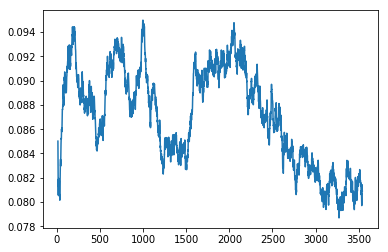

In [35]:
learn.sched.plot_loss()

# Load trained model with sz=256 (optional)

In [92]:
data = get_data(256, bs)

In [93]:
learn = ConvLearner.pretrained(arch, data, ps=0.5, precompute=True, metrics=metrics)

100%|██████████| 957/957 [15:03<00:00,  1.06it/s]


In [94]:
# Restore state before saving
learn.precompute = False
learn.unfreeze()

In [95]:
# Reuse learning rate
lr = 10e-1
lra = [lr/9, lr/3, lr]

In [96]:
learn.load('planet_256_2')

In [97]:
log_pred, y = learn.TTA()

In [98]:
probs = np.mean(log_pred, 0)
f2(probs, y)

0.9311568901949142

In [99]:
thre = opt_th(probs, y)
thre

0.19000000000000003

In [100]:
log_pred_test, _ = learn.TTA(is_test=True)

In [101]:
log_pred_test.shape

(5, 61191, 17)

In [102]:
probs = np.mean(log_pred_test, 0)
probs.shape

(61191, 17)

In [103]:
probs[0]

array([0.00534, 0.00002, 0.00016, 0.00016, 0.0004 , 0.00043, 0.00947, 0.00002, 0.00201, 0.00019, 0.00063,
       0.98066, 0.99109, 0.00037, 0.00014, 0.00015, 0.00444], dtype=float32)

In [104]:
result = [np.array(data.classes)[np.where(p > thre)] for p in probs]
result = [" ".join(r) for r in result]


In [105]:
df = pd.DataFrame(result, columns=['tags'])
df.insert(0, 'image_name', [n[9:-4] for n in data.test_ds.fnames])

In [106]:
df.head()

,image_name,tags
0,test_13001,partly_cloudy primary
1,test_39266,clear primary
2,test_35802,agriculture clear primary road water
3,file_12098,clear primary
4,file_1300,partly_cloudy primary


In [107]:
SUBM = f'{PATH}sub/'
os.makedirs(SUBM, exist_ok=True)
df.to_csv(f'{SUBM}subm.csv', compression=None, index=False)

In [108]:
FileLink(f'{SUBM}subm.csv')

/data/planet/sub/subm.csv

In [81]:
len(list(open(f'{SUBM}subm.csv')))

40670

In [80]:
n

40670

In [91]:
len(os.listdir(f'{PATH}test-jpg'))

61191

In [90]:
len(os.listdir(f'{PATH}test-jpg-additional'))

20522